In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing

from sklearn.preprocessing import StandardScaler

### NOT ALL PACKAGES WILL BE USED, WILL BE EDITED AS I GO

# Model tuning, model selection

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score


# metrics and evaluation

from sklearn.metrics import mean_squared_error, r2_score

import dmba
from dmba import classificationSummary, gainsChart, liftChart, regressionSummary, stepwise_selection, plotDecisionTree
from dmba.metric import AIC_score, adjusted_r2_score, BIC_score

# regression models
from sklearn.linear_model import LinearRegression

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

# classification models

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [228]:
# importing data
# let's focus on RBs first

rb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/rb_19_21_fantasy.csv", index_col = 0)

rb.head()

,player_id,player_name,team_19,position_19,height_19,weight_19,years_exp_19,rookie_year_19,Tm_19,G_19,...,fp_per_gm21,rookie19,rookie20,rookie21,FantasyPoints_19hppr,FantasyPoints_20hppr,FantasyPoints_21hppr,fp_per_gm19hppr,fp_per_gm20hppr,fp_per_gm21hppr
1,00-0032187,David Johnson,ARI,RB,73.0,224.0,4.0,2015.0,ARI,13.0,...,3.769231,0,0,0,159.50,163.5,65.0,12.269231,13.625000,5.000000
2,00-0033118,Kenyan Drake,ARI,RB,73.0,211.0,3.0,2016.0,2TM,14.0,...,6.083333,0,0,0,237.20,179.5,88.0,16.942857,11.966667,7.333333
3,00-0034681,Chase Edmonds,ARI,RB,69.0,210.0,1.0,2018.0,ARI,13.0,...,8.333333,0,0,0,88.80,141.5,121.5,6.830769,8.843750,10.125000
14,00-0030465,Kenjon Barner,ATL,RB,69.0,195.0,6.0,2013.0,ATL,14.0,...,NaN,0,0,0,12.12,NaN,NaN,0.865714,NaN,NaN
15,00-0031285,Devonta Freeman,ATL,RB,68.0,206.0,5.0,2014.0,ATL,14.0,...,7.062500,0,0,0,227.10,32.5,130.0,16.221429,6.500000,8.125000


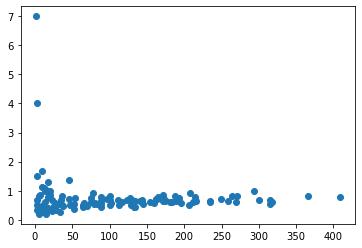

In [229]:
plt.scatter(rb['ttl_opp20'], rb['fp_per_opp20'])

In [230]:
rb.loc[rb['fp_per_opp20'] > 2]

,player_id,player_name,team_19,position_19,height_19,weight_19,years_exp_19,rookie_year_19,Tm_19,G_19,...,fp_per_gm21,rookie19,rookie20,rookie21,FantasyPoints_19hppr,FantasyPoints_20hppr,FantasyPoints_21hppr,fp_per_gm19hppr,fp_per_gm20hppr,fp_per_gm21hppr
402,00-0035924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.538462,0,1,0,NaN,7.5,8.5,NaN,0.535714,0.653846
409,00-0036187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.187500,0,1,0,NaN,9.0,4.5,NaN,0.642857,0.281250


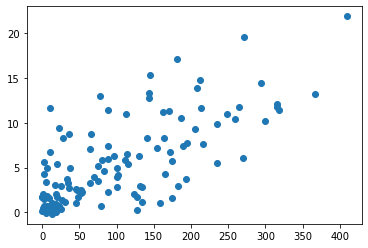

In [231]:
plt.scatter(rb['ttl_opp20'], rb['fp_per_gm21'])

In [232]:
rb.columns

Index(['player_id', 'player_name', 'team_19', 'position_19', 'height_19',
       'weight_19', 'years_exp_19', 'rookie_year_19', 'Tm_19', 'G_19', 'GS_19',
       'Tgt_19', 'Rec_19', 'RushingYds_19', 'RushingTD_19', 'RushingAtt_19',
       'ReceivingYds_19', 'ReceivingTD_19', 'FantasyPoints_19', 'Fumbles_19',
       'FumblesLost_19', 'key_0_20', 'team_20', 'position_20', 'height_20',
       'weight_20', 'years_exp_20', 'rookie_year_20', 'Tm_20', 'G_20', 'GS_20',
       'Tgt_20', 'Rec_20', 'RushingYds_20', 'RushingTD_20', 'RushingAtt_20',
       'ReceivingYds_20', 'ReceivingTD_20', 'FantasyPoints_20', 'Fumbles_20',
       'FumblesLost_20', 'team_21', 'position_21', 'height_21', 'weight_21',
       'years_exp_21', 'rookie_year_21', 'Tm_21', 'Pos_21', 'Age_21',
       'FantasyPoints_21', 'pct_gs19', 'pct_gs20', 'avg_per_rush19',
       'avg_per_rush20', 'avg_per_catch19', 'avg_per_catch20', 'avg_per_tgt19',
       'avg_per_tgt20', 'ttl_touch19', 'ttl_touch20', 'ttl_opp19', 'ttl_opp20',
    

For some initial modeling, let's use FantasyPoints of prev. 2 seasons; total opps prev. 2 seasons; fp_per_game; years_exp

In [233]:
rb_small = rb[['player_id', 'fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'avg_per_rush20', 
               'avg_per_catch20', 'fp_per_gm21hppr']]

rb_X = rb_small.set_index('player_id')

rb_target = rb_small['fp_per_gm21hppr']


In [234]:
rb_target = rb_target.fillna(0)

In [235]:
rb_X = rb_X.fillna(0)

rb_X

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
player_id,,,,,,,
00-0032187,12.269231,13.625000,6,193.0,4.700680,9.515152,5.000000
00-0033118,16.942857,11.966667,5,270.0,3.995816,5.480000,7.333333
00-0034681,6.830769,8.843750,3,164.0,4.618557,7.584906,10.125000
00-0030465,0.865714,0.000000,8,1.0,0.000000,0.000000,0.000000
00-0031285,16.221429,6.500000,7,64.0,3.185185,8.285714,8.125000
...,...,...,...,...,...,...,...
00-0035806,0.000000,3.437500,1,47.0,3.794872,4.714286,3.500000
00-0036450,0.000000,2.050000,1,36.0,4.192308,6.800000,2.916667
00-0033925,0.000000,2.750000,4,23.0,4.318182,5.000000,9.944444


In [236]:
rb_X.corr()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
fp_per_gm19hppr,1.000000,0.648698,0.329865,0.530452,0.265139,0.155047,0.600250
fp_per_gm20hppr,0.648698,1.000000,0.026779,0.866037,0.488214,0.311668,0.759553
years_exp_21,0.329865,0.026779,1.000000,0.050259,-0.085290,-0.051345,0.021461
ttl_opp20,0.530452,0.866037,0.050259,1.000000,0.463566,0.240742,0.728317
avg_per_rush20,0.265139,0.488214,-0.085290,0.463566,1.000000,0.348063,0.393512
avg_per_catch20,0.155047,0.311668,-0.051345,0.240742,0.348063,1.000000,0.168934
fp_per_gm21hppr,0.600250,0.759553,0.021461,0.728317,0.393512,0.168934,1.000000


In [237]:
# splitting into train and test

rb_x_train, rb_x_test, rb_y_train, rb_y_test = train_test_split(rb_X, rb_target, test_size = .25, random_state = 0)



Decision trees don't need much pre-processing, so let's try modeling with one first

In [238]:
# decision tree regressor

dt_reg = tree.DecisionTreeRegressor(random_state = 0)

dt_reg = dt_reg.fit(rb_x_train, rb_y_train)


In [239]:
dt_pred_train = dt_reg.predict(rb_x_train)
dt_pred_test = dt_reg.predict(rb_x_test)

dt_pred_test

array([ 2.        ,  5.35714286,  2.        , 11.32142857,  6.        ,
        3.        ,  5.86363636,  6.875     ,  6.82142857,  2.26923077,
        8.66666667, 10.14705882,  3.75      , 20.76470588,  2.91666667,
        6.        , 10.14705882,  0.28571429, 12.375     , 10.14705882,
       13.69230769,  0.80769231,  2.91666667,  5.78125   ,  4.41666667,
        3.47058824,  5.        , 13.53333333, 12.375     ,  0.75      ,
        0.875     ,  0.80769231,  2.22222222])

In [240]:
values = ['Decision Tree', np.sqrt(mean_squared_error(rb_y_train, dt_pred_train)),
         np.sqrt(mean_squared_error(rb_y_test, dt_pred_test))]

values = pd.DataFrame([values], columns = ['Model Type', 'Train Error', 'Test Error'])

values

,Model Type,Train Error,Test Error
0,Decision Tree,0.0,0.465304


In [241]:
# Visualizing DT
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere

import graphviz

dot_tree = tree.export_graphviz(dt_reg, out_file ='tree.dot')

In [242]:
graph = graphviz.Source(dot_tree)

In [243]:
# graph

### Pre-Processing for other modeling

In [244]:
rb_trans.corr()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr,fpg19_trans,fpg20_trans,ye21_trans,to20_trans,fpg21_trans
fp_per_gm19hppr,1.000000,0.648698,0.329865,0.530452,0.265139,0.155047,0.600250,0.956624,0.606831,0.390601,0.521965,0.590013
fp_per_gm20hppr,0.648698,1.000000,0.026779,0.866037,0.488214,0.311668,0.759553,0.558539,0.959658,0.043812,0.851055,0.722386
years_exp_21,0.329865,0.026779,1.000000,0.050259,-0.085290,-0.051345,0.021461,0.392850,0.056403,0.968649,0.082918,0.064608
ttl_opp20,0.530452,0.866037,0.050259,1.000000,0.463566,0.240742,0.728317,0.502173,0.874711,0.052351,0.962985,0.704128
avg_per_rush20,0.265139,0.488214,-0.085290,0.463566,1.000000,0.348063,0.393512,0.290250,0.568873,-0.076044,0.531948,0.436311
avg_per_catch20,0.155047,0.311668,-0.051345,0.240742,0.348063,1.000000,0.168934,0.148382,0.370003,-0.070054,0.293942,0.187776
fp_per_gm21hppr,0.600250,0.759553,0.021461,0.728317,0.393512,0.168934,1.000000,0.533245,0.729905,0.044177,0.701455,0.969194
fpg19_trans,0.956624,0.558539,0.392850,0.502173,0.290250,0.148382,0.533245,1.000000,0.559611,0.455172,0.517643,0.553370
fpg20_trans,0.606831,0.959658,0.056403,0.874711,0.568873,0.370003,0.729905,0.559611,1.000000,0.060276,0.911293,0.728101
ye21_trans,0.390601,0.043812,0.968649,0.052351,-0.076044,-0.070054,0.044177,0.455172,0.060276,1.000000,0.078007,0.077190


In [245]:
rb_X.describe()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,6.233781,5.943615,3.751938,95.643411,3.592165,6.487472,5.991770
std,7.066929,5.699271,2.304991,95.060080,1.644691,3.670383,5.163123
min,-1.000000,0.000000,1.000000,0.000000,-1.000000,-3.000000,-0.166667
25%,0.000000,1.000000,2.000000,13.000000,3.176471,5.000000,1.772727
50%,3.693333,4.545455,3.000000,69.000000,4.148515,6.800000,4.437500
75%,10.762500,8.769231,5.000000,159.000000,4.570175,8.305556,9.566667
max,32.950000,27.166667,14.000000,409.000000,6.500000,27.000000,23.000000


In [246]:
# if i need to take out negatives
# rb_X = rb_X[(rb_X[rb_X.columns] >= 0).all(axis = 1)]

In [247]:
rb_X

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
player_id,,,,,,,
00-0032187,12.269231,13.625000,6,193.0,4.700680,9.515152,5.000000
00-0033118,16.942857,11.966667,5,270.0,3.995816,5.480000,7.333333
00-0034681,6.830769,8.843750,3,164.0,4.618557,7.584906,10.125000
00-0030465,0.865714,0.000000,8,1.0,0.000000,0.000000,0.000000
00-0031285,16.221429,6.500000,7,64.0,3.185185,8.285714,8.125000
...,...,...,...,...,...,...,...
00-0035806,0.000000,3.437500,1,47.0,3.794872,4.714286,3.500000
00-0036450,0.000000,2.050000,1,36.0,4.192308,6.800000,2.916667
00-0033925,0.000000,2.750000,4,23.0,4.318182,5.000000,9.944444


<AxesSubplot:>

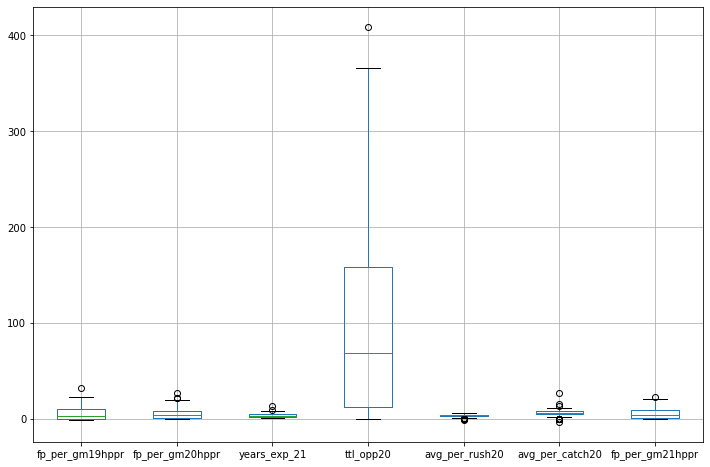

In [248]:
plt.figure(figsize = (12,8))
rb_X.boxplot()

In [249]:
# fp_gm19_box = stats.boxcox(rb_X['fp_per_gm19hppr'])

In [250]:
sc = StandardScaler()

rb_trans = sc.fit_transform(rb_X)

rb_trans = pd.DataFrame(rb_trans, columns = rb_X.columns)

rb_trans.head()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
0,0.857371,1.353038,0.979104,1.028151,0.676624,0.828111,-0.192836
1,1.521287,1.060931,0.543572,1.841323,0.246383,-0.275557,0.260849
2,0.084806,0.510845,-0.327493,0.721892,0.626496,0.300163,0.803650
3,-0.762565,-1.046939,1.850169,-0.999498,-2.192612,-1.774410,-1.165018
4,1.418804,0.098004,1.414637,-0.334176,-0.248416,0.491843,0.414777


<AxesSubplot:>

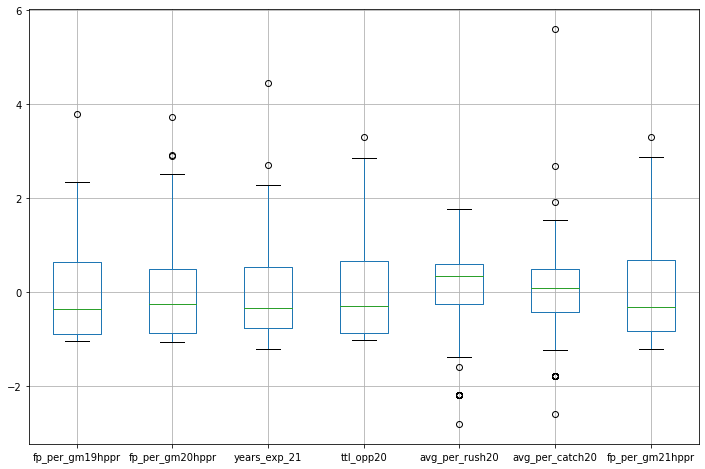

In [251]:
plt.figure(figsize = (12,8))
rb_trans.boxplot()

In [252]:
rb_trans.columns

Index(['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20',
       'avg_per_rush20', 'avg_per_catch20', 'fp_per_gm21hppr'],
      dtype='object')

fp_per_gm, ttl_opp,and years_exp all have right skewed distributions, exponential like.

avg_per_rush has a left skewed distribution. Avg per catch is about normal.

In [253]:
fpg19_trans = stats.yeojohnson(rb_trans['fp_per_gm19hppr'])
fpg20_trans = stats.yeojohnson(rb_trans['fp_per_gm20hppr'])
ye21_trans = stats.yeojohnson(rb_trans['years_exp_21'])
to20_trans = stats.yeojohnson(rb_trans['ttl_opp20'])
fpg21_trans = stats.yeojohnson(rb_trans['fp_per_gm21hppr'])



In [254]:
rb_trans_unskewed = pd.DataFrame([pd.Series(fpg19_trans), pd.Series(fpg20_trans), pd.Series(ye21_trans), 
                                  pd.Series(to20_trans), pd.Series(fpg21_trans)],
                                 columns = ['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'fp_per_gm21hppr'])

In [256]:
rb_trans['fpg19_trans'] = pd.Series(fpg19_trans[0])
rb_trans['fpg20_trans'] = pd.Series(fpg20_trans[0])
rb_trans['ye21_trans'] = pd.Series(ye21_trans[0])
rb_trans['to20_trans'] = pd.Series(to20_trans[0])
rb_trans['fpg21_trans'] = pd.Series(fpg21_trans[0])

<AxesSubplot:>

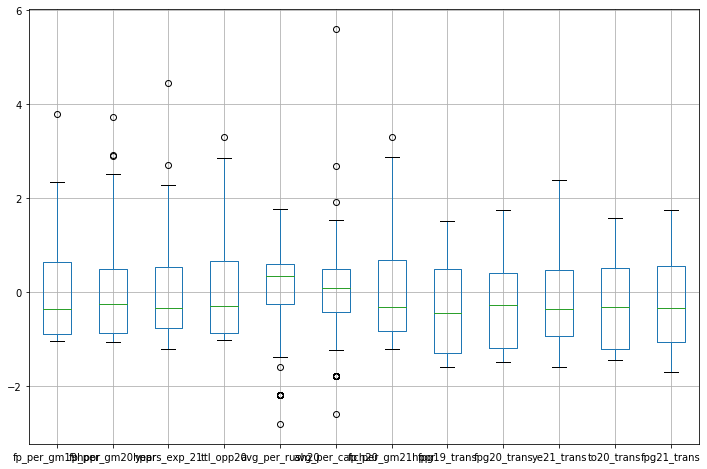

In [257]:
plt.figure(figsize = (12,8))
rb_trans.boxplot()

In [258]:
rb_pp = rb_trans.drop(['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'fp_per_gm21hppr'], axis = 1)

In [259]:
rb_pp


,avg_per_rush20,avg_per_catch20,fpg19_trans,fpg20_trans,ye21_trans,to20_trans,fpg21_trans
0,0.676624,0.828111,0.612516,0.915854,0.779829,0.736543,-0.206703
1,0.246383,-0.275557,0.909995,0.765811,0.472132,1.109273,0.238437
2,0.626496,0.300163,0.081285,0.426331,-0.359406,0.560688,0.634175
3,-2.192612,-1.774410,-1.065761,-1.489014,1.287651,-1.428294,-1.642071
4,-0.248416,0.491843,0.869789,0.094184,1.047986,-0.383040,0.362020
...,...,...,...,...,...,...,...
124,0.123730,-0.484990,-1.294843,-0.521884,-1.593260,-0.628526,-0.570283
125,0.366319,0.085480,-1.294843,-0.878089,-1.593260,-0.801898,-0.727639
126,0.443151,-0.406844,-1.294843,-0.692514,0.104627,-1.021354,0.611544
127,0.161739,1.918020,-1.294843,-0.629125,-1.593260,-1.109932,-0.704624


In [260]:
rb_pp_X = rb_pp.drop(['fpg21_trans'], axis = 1)
rb_pp_y = rb_pp['fpg21_trans']

rb_pp_x_train, rb_pp_x_test, rb_pp_y_train, rb_pp_y_test = train_test_split(rb_pp_X, rb_pp_y, test_size = .25, random_state = 0)

### LINEAR REGRESSION

In [261]:
lin_reg = LinearRegression()

lin_reg.fit(rb_pp_x_train, rb_pp_y_train)

LinearRegression()

In [262]:
lr_pred_test = lin_reg.predict(rb_pp_x_test)
lr_pred_train = lin_reg.predict(rb_pp_x_train)

lr_pred_test

array([ 0.04565147, -0.8995001 , -1.35935225,  0.78911808, -1.1617012 ,
       -0.57737567, -1.16954314, -0.09259256,  0.37836419, -1.09555592,
        0.57769406,  0.45380238, -0.64683291,  1.24896293,  0.19760374,
       -0.26181442,  0.33881409,  0.10094705,  0.0896751 ,  0.14422218,
        0.94817751, -1.23167503, -0.01183887,  0.30318729, -0.68287698,
       -0.64625817, -1.16176251,  0.9149031 , -0.77770382, -0.42332721,
       -1.20907459, -1.2477523 , -1.26902687])

# we may have to transform transformed errors back into normal

### See note below on how to possibly do this

It sounds like you effectively want the geometric standard error, akin to the geometric mean exp(mean(log(x))).

While it might seem reasonable to compute that as:

exp(sd(log(x)/sqrt(n-1)))

You and others have already pointed out that that isn't correct for a few reasons. Instead, use:

exp(mean(log(x))) * (sd(log(x))/sqrt(n-1))


In [263]:
values_lr = ['Logistic Regression', np.sqrt(mean_squared_error(rb_pp_y_train, lr_pred_train)),
         np.sqrt(mean_squared_error(rb_pp_y_test, lr_pred_test))]

values = values.append(pd.Series(values_lr, index = ['Model Type', 'Train Error', 'Test Error']), ignore_index = True)

C:\Users\steph\AppData\Local\Temp/ipykernel_34584/2792587993.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  values = values.append(pd.Series(values_lr, index = ['Model Type', 'Train Error', 'Test Error']), ignore_index = True)


In [264]:
values

,Model Type,Train Error,Test Error
0,Decision Tree,0.000000,0.465304
1,Logistic Regression,0.577881,0.673765
